# Descriptive statistics on customer data

The objective here is to explore the relationships between recency, frequency and revenue to create a "clustering" procedure and split the dataset into low-, mid- and high-value customer categories.

## 1. Import packages

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# render figures in notebook
%matplotlib inline

## 2. Load data

In [2]:
df = pd.read_csv('data/Customer.csv')
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,301,0,312,1,5288.63,0,1,Low-Value
1,15808.0,305,0,210,1,3724.77,0,1,Low-Value
2,13047.0,31,3,196,1,3079.10,0,4,Mid-Value
3,14688.0,7,3,359,1,5107.38,0,4,Mid-Value
4,13448.0,16,3,199,1,3465.67,0,4,Mid-Value


- Recency: how many days have passed since the customer’s last purchase
- Frequency: how many orders the customer placed
- Revenue: the total amount purchased by a given customer

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3950 non-null   float64
 1   Recency           3950 non-null   int64  
 2   RecencyCluster    3950 non-null   int64  
 3   Frequency         3950 non-null   int64  
 4   FrequencyCluster  3950 non-null   int64  
 5   Revenue           3950 non-null   float64
 6   RevenueCluster    3950 non-null   int64  
 7   OverallScore      3950 non-null   int64  
 8   Segment           3950 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 277.9+ KB


## 3. Univariate descriptive statistics

We'll have 3 variables: recency, frequency and revenue.

### 3.1 Density and histogram frequency plots

In [4]:
# set sns style
sns.set_style('darkgrid')

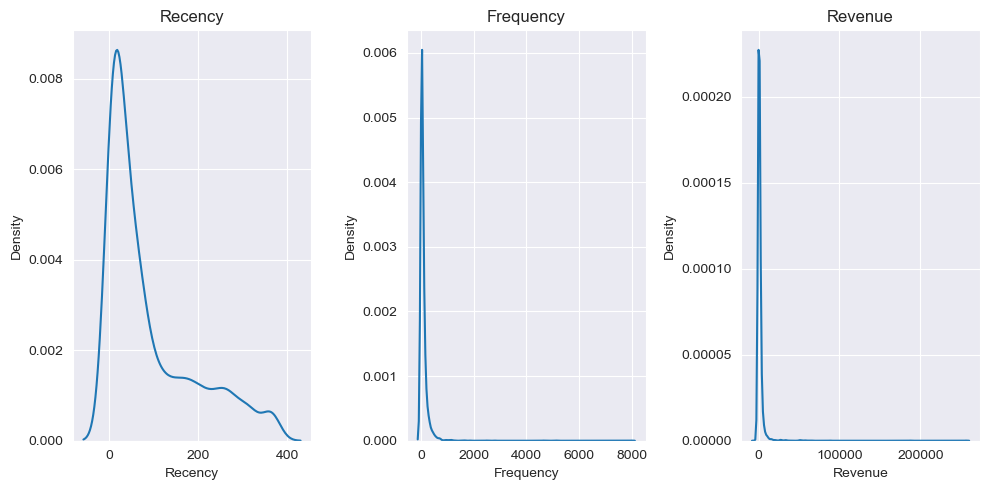

In [5]:
# figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5))

# kernel density estimate plots (bandwith adjust)
sns.kdeplot(ax=ax1, x=df['Recency'], bw_adjust=1).set_title('Recency')
sns.kdeplot(ax=ax2, x=df['Frequency'], bw_adjust=1).set_title('Frequency')
sns.kdeplot(ax=ax3, x=df['Revenue'], bw_adjust=1).set_title('Revenue')

plt.tight_layout()

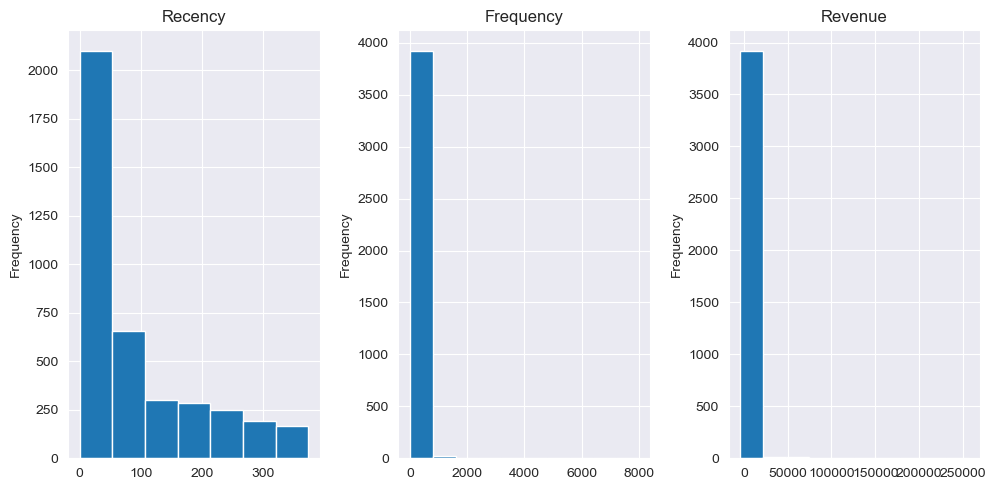

In [6]:
# figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5))

# frequency plots
ax1.hist(df["Recency"], bins = 7)
ax1.set_ylabel('Frequency')
ax1.set_title('Recency')

ax2.hist(df["Frequency"])
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency')

ax3.hist(df["Revenue"])
ax3.set_ylabel('Frequency')
ax3.set_title('Revenue')

plt.tight_layout()

In [7]:
# distributions are asymmetrical
# frequency and revenus seem to have outliers

### 3.2 Generate descriptive statistics

In [8]:
# fast way
df['Recency'].describe()

count    3950.000000
mean       90.778481
std       100.230349
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [9]:
# better layout
pd.DataFrame(df["Recency"]).describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
Recency,3950.0,90.778481,100.230349,0.0,16.0,49.0,142.0,373.0


In [10]:
pd.DataFrame(df["Frequency"]).describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
Frequency,3950.0,91.614684,220.557389,1.0,17.0,41.0,101.0,7983.0


In [11]:
pd.DataFrame(df["Revenue"]).describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
Revenue,3950.0,1713.385669,6548.608224,-4287.63,282.255,627.06,1521.7825,256438.49


In [12]:
# medians < means -> right-skewed
# outliers present for frequency and revenue
# recency starts at 0 -> customer has just ordered
# recency median 49 days -> ~50% customers have been active in the last 2 months
# median number of orders placed is 41
# minimum revenue is below 0 -> losing money on some customers

In [13]:
# interquartile ranges (interpolation -> method used when percentile liest between two data points)
stats.iqr(pd.DataFrame(df['Recency']), interpolation = 'midpoint')

126.0

In [14]:
stats.iqr(pd.DataFrame(df["Frequency"]), interpolation = 'midpoint')

84.0

In [15]:
stats.iqr(pd.DataFrame(df["Revenue"]), interpolation = 'midpoint')

1239.4550000000006

In [16]:
# standard deviation or revenue (6548) is very high compared to iqr (1239) -> outliers

In [17]:
# skewness
stats.skew(df["Recency"])

1.24904560327501

In [18]:
stats.skew(df["Frequency"])

18.64267072676056

In [19]:
stats.skew(df["Revenue"])

23.337368043729484

In [20]:
# positive skewness scores -> right-skewed distributions

### 3.3 Outliers

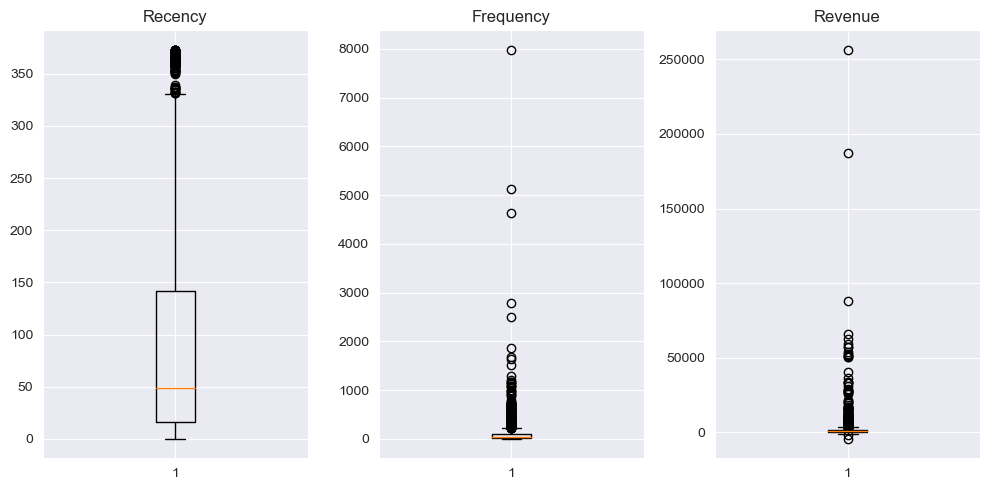

In [21]:
# set figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5))

# boxplots to identify potential outliers
ax1.boxplot(df["Recency"])
ax1.set_title('Recency')

ax2.boxplot(df["Frequency"])
ax2.set_title('Frequency')

ax3.boxplot(df["Revenue"])
ax3.set_title('Revenue')

plt.tight_layout()

### 3.4 Customer categories

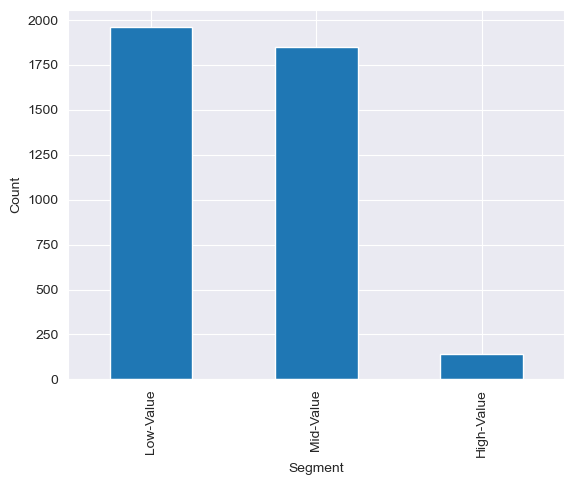

In [22]:
# groupby on segment column
# .size -> row count for each group
# .reindex -> specific x-axis order
df.groupby('Segment').size().reindex(['Low-Value', 'Mid-Value', 'High-Value']).plot.bar()
plt.ylabel('Count')
plt.show()

In [23]:
occurrences = df.groupby('Segment').size()
occurrences

Segment
High-Value     144
Low-Value     1958
Mid-Value     1848
dtype: int64

In [24]:
# only 144 high-value customers, might be a good idea to focus on developing marketing campaigns on mid

## 4. Data distributions transformation

Data transformations are a common preprocessing step before training machine learning models as some algorithms are sensitive to different scales of variations between columns. To avoid this issue and give the same weight to each feature, scaling is needed.

### 4.1 Box-Cox

Box-Cox is designed and usually used for non-negative responses.

In [25]:
from scipy.stats import boxcox

# frequency df
orig_var = df["Frequency"]

# boxcox transformation
trans_var, lam = boxcox(orig_var)

transformed_data = pd.DataFrame({"original_freq": orig_var, "transformed_freq": trans_var})
transformed_data.head()

,original_freq,transformed_freq
0,312,6.859724
1,210,6.307086
2,196,6.212117
3,359,7.058779
4,199,6.232992


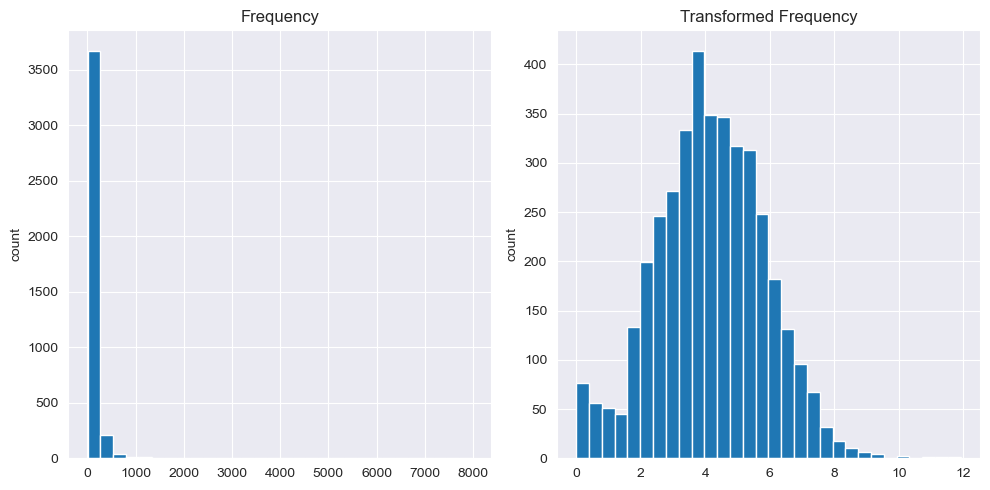

In [26]:
# compare original and transformed data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# original data
ax1.hist(transformed_data["original_freq"], bins=30)
ax1.set_ylabel('count')
ax1.set_title('Frequency')

# transformed data boxcox
ax2.hist(transformed_data["transformed_freq"], bins=30)
ax2.set_ylabel('count')
ax2.set_title('Transformed Frequency')

plt.tight_layout()

In [27]:
# good result as transformed frequency distributions looks more like a gaussian distribution

### 4.2 Box-Cox & Min-max

As Box-Cox transformation is applicable to positive values, we need to trasform features that have negative values first if we really want to use this type of transformation.

In [28]:
# MinMaxScaling function
def MinMaxScaling(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# boxcox already imported

In [29]:
# original
orig_var = df["Recency"]

# minmaxscaling + 1 to ensure positive values
scaled_recency = MinMaxScaling(orig_var) + 1

# boxcox on minmax scaled values
transformed_recency, lam = boxcox(scaled_recency)

transformed_data = pd.DataFrame({"orig_recency": orig_var, "scaled_recency": scaled_recency, "trans_recency": transformed_recency})
transformed_data.head()

,orig_recency,scaled_recency,trans_recency
0,301,1.806971,0.251861
1,305,1.817694,0.252618
2,31,1.083110,0.069767
3,7,1.018767,0.018008
4,16,1.042895,0.039094


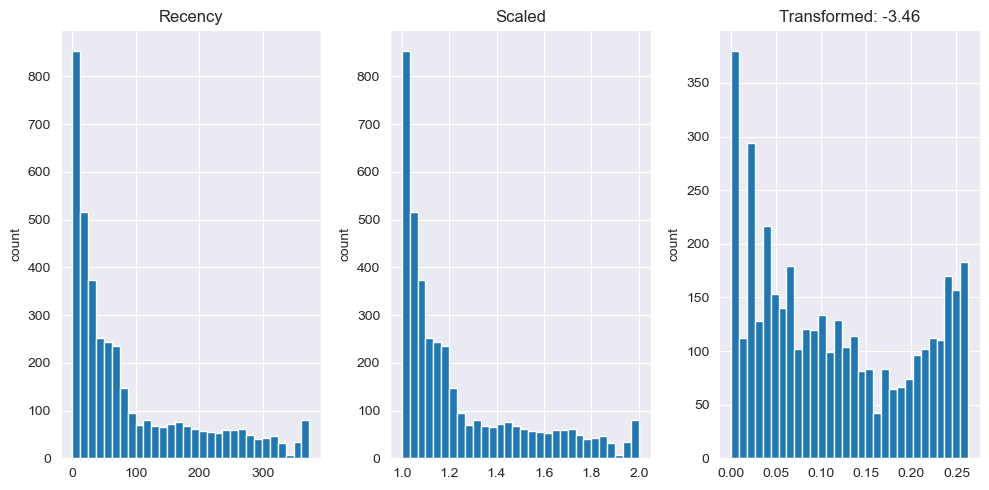

In [30]:
# subplots setup
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5))

# original data
ax1.hist(transformed_data["orig_recency"], bins=30)
ax1.set_ylabel('count')
ax1.set_title('Recency')

# minxmax + 1 scaled data
ax2.hist(transformed_data["scaled_recency"], bins=30)
ax2.set_ylabel('count')
ax2.set_title('Scaled')

# boxcox data after minmax + 1
ax3.hist(transformed_data["trans_recency"], bins=30)
ax3.set_ylabel('count')
ax3.set_title(f'Transformed: {round(lam, 2)}')

plt.tight_layout()

In [31]:
# same procedure on 'Revenue' column (contains negative values as well)

# original
orig_var = df["Revenue"]

# minmaxscaling + 1 to ensure positive values
scaled_revenue = MinMaxScaling(orig_var) + 1

# boxcox on minmax scaled values
transformed_revenue, lam = boxcox(scaled_revenue)

transformed_data = pd.DataFrame({"orig_revenue": orig_var, "scaled_revenue": scaled_revenue, "trans_revenue": transformed_revenue})
transformed_data.head()

,orig_revenue,scaled_revenue,trans_revenue
0,5288.63,1.036729,0.010113
1,3724.77,1.030731,0.009868
2,3079.10,1.028255,0.009719
3,5107.38,1.036034,0.010091
4,3465.67,1.029737,0.009812


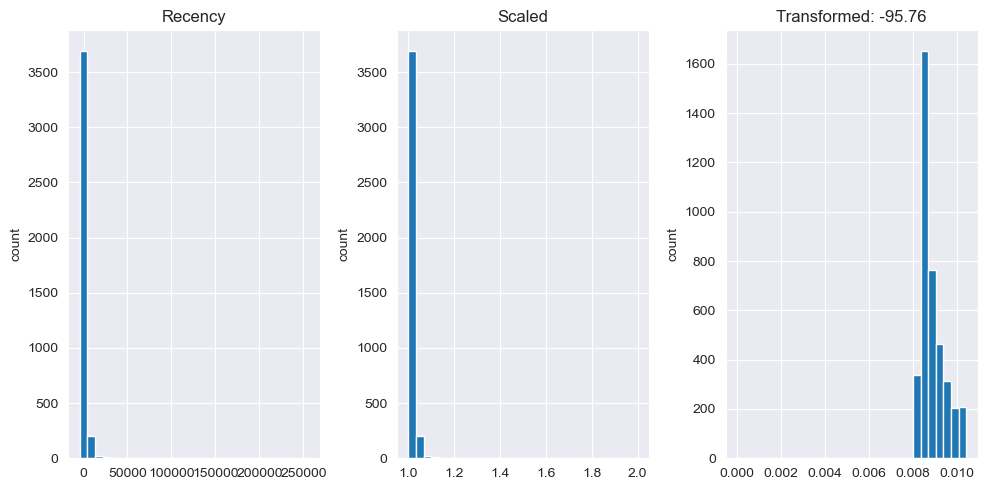

In [32]:
# same procedure on 'Revenue' column

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5))

ax1.hist(transformed_data["orig_revenue"], bins=30)
ax1.set_ylabel('count')
ax1.set_title('Recency')

ax2.hist(transformed_data["scaled_revenue"], bins=30)
ax2.set_ylabel('count')
ax2.set_title('Scaled')

ax3.hist(transformed_data["trans_revenue"], bins=30)
ax3.set_ylabel('count')
ax3.set_title(f'Transformed: {round(lam, 2)}')

plt.tight_layout()

### 4.3 Transform categorical values

- Low-Value = 1
- Mid-Value = 2
- High-Value = 3

In [33]:
# create dataframe copy
df_segment_code = df.copy()

In [34]:
# to_numeric function definition
def to_numeric(row):
    if row.Segment == 'Low-Value':
        return 1
    if row.Segment == 'Mid-Value':
        return 2
    if row.Segment == 'High-Value':
        return 3
    raise ValueError(f'"{row.Segment}" is not a valid value.')

# apply function for each row on SegmentCode column (axis = 1 -> column selected -> apply function to each row)
df_segment_code['SegmentCode'] = df.apply(lambda row: to_numeric(row), axis=1)
df_segment_code

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,SegmentCode
0,17850.0,301,0,312,1,5288.63,0,1,Low-Value,1
1,15808.0,305,0,210,1,3724.77,0,1,Low-Value,1
2,13047.0,31,3,196,1,3079.10,0,4,Mid-Value,2
3,14688.0,7,3,359,1,5107.38,0,4,Mid-Value,2
4,13448.0,16,3,199,1,3465.67,0,4,Mid-Value,2
...,...,...,...,...,...,...,...,...,...,...
3945,13263.0,0,3,1677,2,7454.07,1,6,High-Value,3
3946,14056.0,0,3,1128,2,8124.40,1,6,High-Value,3
3947,12748.0,0,3,4642,3,29072.10,1,7,High-Value,3
3948,17450.0,7,3,351,1,187482.17,3,7,High-Value,3


## 5. Relationships between features

Let's have a look at the relationships among revenue, recency and frequency.

### 5.1 Violinplots

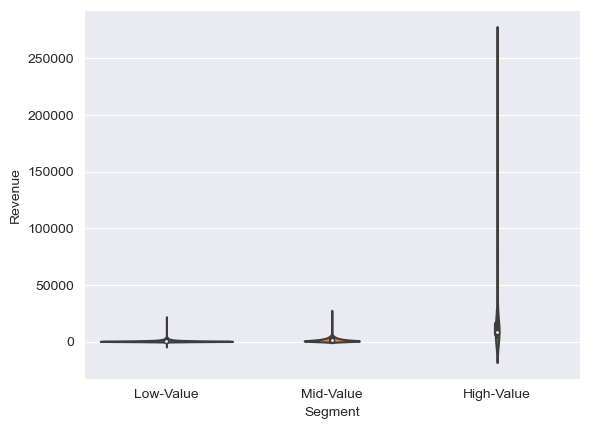

In [35]:
# violinplot segment vs revenue
sns.violinplot(data=df, x='Segment', y='Revenue', width=0.8);

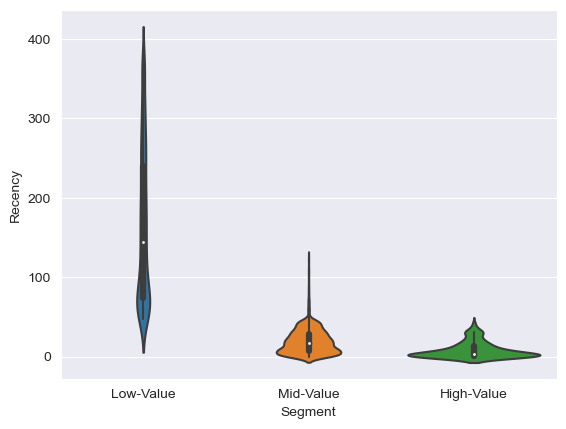

In [36]:
# violinplot segment vs recency
sns.violinplot(data=df, x='Segment', y='Recency', width=0.8);

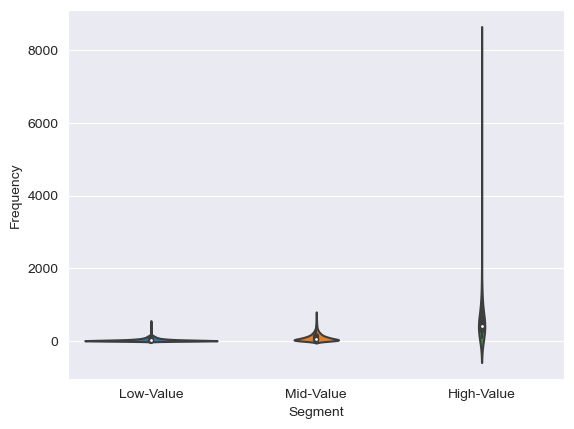

In [37]:
# violinplot segment vs frequency
sns.violinplot(data=df, x='Segment', y='Frequency', width=0.8);

### 5.2 Correlations and heatmaps

In [38]:
# filter selected columns
numeric_df = df.filter(items=['Recency', 'Frequency', 'Revenue'])

# correlation on columns
corr = numeric_df.corr()

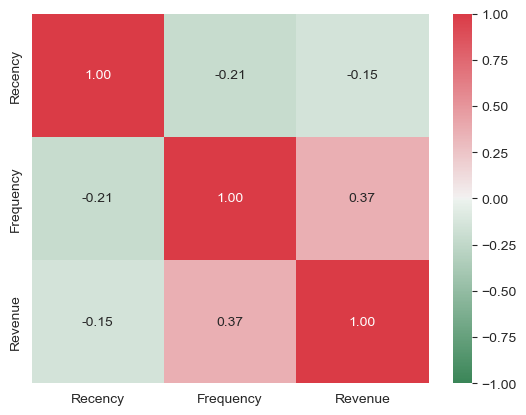

In [39]:
# heatmap
# fmt='.2f' -> display corr values as arguments on the heatmap (needs annot=True)
sns.heatmap(corr, cmap=sns.diverging_palette(140, 10, as_cmap=True), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [40]:
# recency is negatively correlated with frequency and revenue
# (fewer days passed since last purchase -> more likely to have made more orders -> higher revenue

### 5.3 Overall score vs recency / frequency / revenue

Mix of ordinal and numeric data -> spearman correlation coefficient preferred

In [41]:
# filter selected columns
numeric_df = df.filter(items=['Recency', 'Frequency', 'Revenue', 'OverallScore'])

# correlation on columns (spearman -> nonparametric measure of rank correlation)
corr = numeric_df.corr(method='spearman')

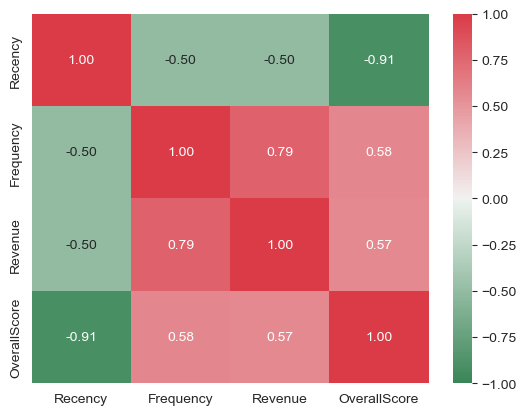

In [42]:
#heatmap
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [43]:
# overallscore is almost perfectly negatively correlated with recency

In [44]:
# spearman corr > pearson corr
# pearson -> how linear the relationship is between 2 variables
# spearman -> how monotonous the relationship is between 2 variables

### 5.4 High correlation = same information

When features are highly correlated it is generally necessary to only keep one of those to feed the model training pipeline. Below we'll try to create a dataset that only keeps a subset of features that have a correlation < 0.75.

In [45]:
# change diagonal values to 0
for i in range(len(corr)):
               corr.iloc[i,i] = 0

In [46]:
# absolute correlation values
corr_df = corr.abs().unstack().sort_values(ascending=False).reset_index()
corr_df

,level_0,level_1,0
0,Recency,OverallScore,0.909566
1,OverallScore,Recency,0.909566
2,Frequency,Revenue,0.788353
3,Revenue,Frequency,0.788353
4,Frequency,OverallScore,0.583419
5,OverallScore,Frequency,0.583419
6,Revenue,OverallScore,0.569073
7,OverallScore,Revenue,0.569073
8,Recency,Frequency,0.504749
9,Frequency,Recency,0.504749


In [47]:
# select correlation < 0.75
corr_df = corr_df[corr_df[0] > 0.75]
corr_df

,level_0,level_1,0
0,Recency,OverallScore,0.909566
1,OverallScore,Recency,0.909566
2,Frequency,Revenue,0.788353
3,Revenue,Frequency,0.788353


In [48]:
# drop duplicates (appearing twice i.e. recency vs overallscore and overallscore vs recency)
# slicing every two rows
to_drop = corr_df.loc[::2, 'level_0']
to_drop

0      Recency
2    Frequency
Name: level_0, dtype: object

In [49]:
# filtered df (dropping recency as high corr with overallscore and frequency as high corr with revenue)
filtered_df = numeric_df.drop(columns=to_drop)
filtered_df.head()

,Revenue,OverallScore
0,5288.63,1
1,3724.77,1
2,3079.10,4
3,5107.38,4
4,3465.67,4


### 5.5 2D histograms

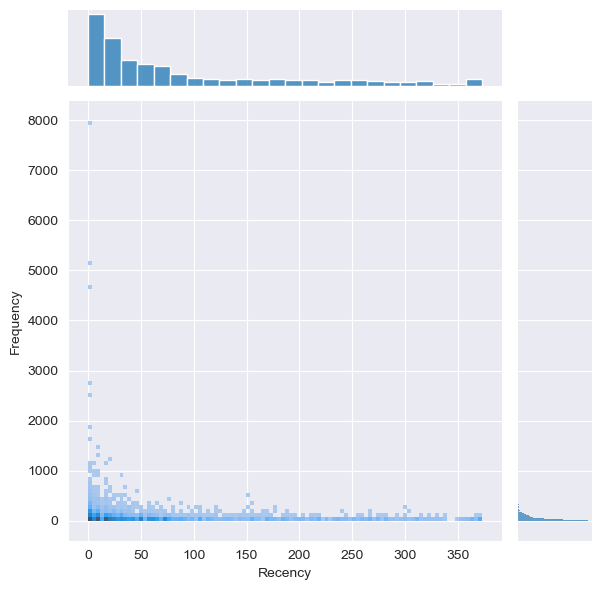

In [50]:
# recency vs frequency including respective histograms
sns.jointplot(data=df, x="Recency", y="Frequency", kind="hist", bins = 100);

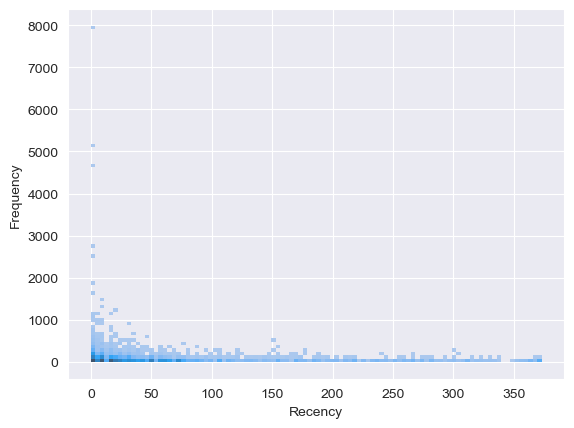

In [51]:
# recency vs frequency distribution
sns.histplot(data=df, x="Recency", y="Frequency", bins = 100);

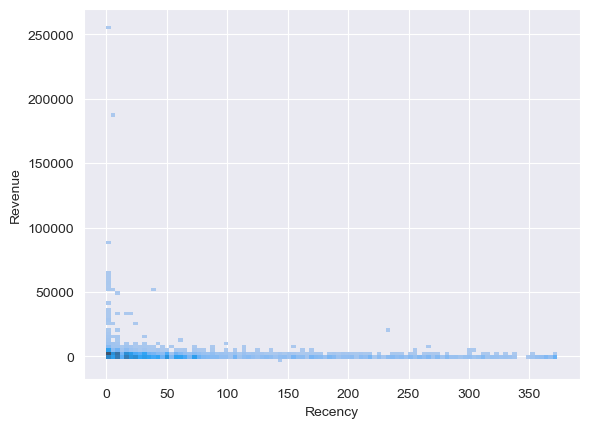

In [52]:
# recency vs revenue distribution
sns.histplot(data=df, x="Recency", y="Revenue", bins = 100);

In [53]:
# "L-shaped" distribution
# high revenue and high frequency are reached by customers with a recency close to 0
# if recency is high (inactive for a long time), the revenue and frequency is low

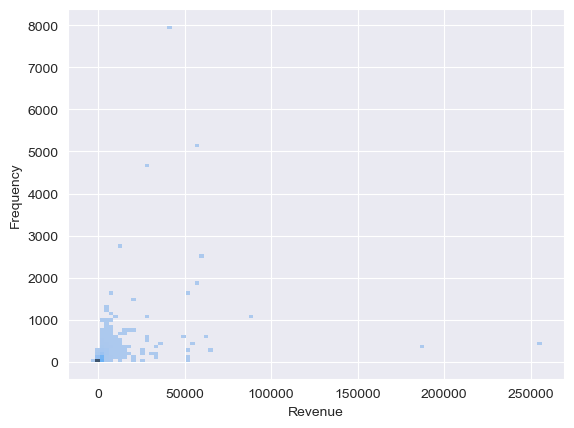

In [54]:
# frequency vs revenue distribution
sns.histplot(data=df, x="Revenue", y="Frequency", bins = 100);

In [55]:
# slight positive correlation between revenue and frequency
# high revenue outliers with low frequency do not follow the trends stated above, seem isolated events

## Final considerations

- The revenue data includes some outliers that might not be very relevant to take into account in our future modelling
- Prior to transformation, distributions are far from Gaussian, that's why we needed to transform and scale data before training any model